# 2. Problem Statement: Analysing Weather Data from OpenWeatherMap API
● Interact with the OpenWeatherMap API using the API key to retrieve weather data for a specific location.

● Extract relevant weather attributes such as temperature, humidity, wind speed, and precipitation from the API response.

● Clean and preprocess the retrieved data, handling missing values or inconsistent formats.

● Perform data modelling to analyse weather patterns, such as calculating average temperature, maximum/minimum values, or trends over time.

● Visualise the weather data using appropriate plots, such as line charts, bar plots, or scatter plots, to represent temperature changes, precipitation levels, or wind speed variations.

● Apply data aggregation techniques to summarise weather statistics by specific time periods (e.g., daily, monthly, seasonal).

● Explore and visualise relationships between weather attributes, such as temperature and humidity, using correlation plots or heatmaps.

# Interact with the OpenWeatherMap API using the API key to retrieve weather data for a specific location.

In [1]:
import requests as req
url = 'https://api.openweathermap.org/data/2.5/forecast?lat=44.34&lon=10.99&appid=42c0ec72b2732966c88a88838a86ba63'

response = req.get(url)
data = response.json()['list']

# Extract relevant weather attributes such as temperature, humidity, wind speed, and precipitation from the API response.

In [3]:
records = {'temp':[],'humid':[],'wind speed':[],'weather description':[],'date and time':[]}
for record in data:
    records['temp'].append(record['main']['temp'])
    records['humid'].append(record['main']['humidity'])
    records['wind speed'].append(record['wind']['speed'])
    records['weather description'].append(record['weather'][0]['description'])
    records['date and time'].append(record['dt_txt'])

In [4]:
import pandas as pd
weather = pd.DataFrame(records)
weather.head()

,temp,humid,wind speed,weather description,date and time
0,282.03,80,0.78,broken clouds,2024-11-05 09:00:00
1,284.86,73,1.86,broken clouds,2024-11-05 12:00:00
2,285.25,86,1.34,overcast clouds,2024-11-05 15:00:00
3,282.48,93,1.04,overcast clouds,2024-11-05 18:00:00
4,281.69,93,1.51,broken clouds,2024-11-05 21:00:00


# Clean and preprocess the retrieved data, handling missing values or inconsistent formats.

In [5]:
weather.isna().sum()

temp                   0
humid                  0
wind speed             0
weather description    0
date and time          0
dtype: int64

In [6]:
weather.dtypes

temp                   float64
humid                    int64
wind speed             float64
weather description     object
date and time           object
dtype: object

In [9]:
weather['date and time'] = pd.to_datetime(weather['date and time'])
weather['time'] = weather['date and time'].dt.time
weather['date'] = weather['date and time'].dt.date

In [10]:
weather.dtypes

temp                          float64
humid                           int64
wind speed                    float64
weather description            object
date and time          datetime64[ns]
date                           object
time                           object
dtype: object

# Perform data modelling to analyse weather patterns, such as calculating average temperature, maximum/minimum values, or trends over time.

In [11]:
weather.describe()

,temp,humid,wind speed,date and time
count,40.000000,40.000000,40.000000,40
mean,281.678250,85.150000,1.428750,2024-11-07 19:30:00
min,278.350000,63.000000,0.780000,2024-11-05 09:00:00
25%,279.617500,80.750000,1.232500,2024-11-06 14:15:00
50%,280.745000,87.000000,1.460000,2024-11-07 19:30:00
75%,284.020000,92.000000,1.547500,2024-11-09 00:45:00
max,286.680000,95.000000,2.200000,2024-11-10 06:00:00
std,2.499722,8.636684,0.292638,NaN


In [16]:
weather.groupby('date').agg({'temp':'mean',
                             'humid':'mean',
                             'wind speed':'mean'})

,temp,humid,wind speed
date,,,
2024-11-05,283.262000,85.000,1.306000
2024-11-06,282.390000,83.250,1.378750
2024-11-07,281.792500,87.625,1.501250
2024-11-08,281.548750,85.125,1.467500
2024-11-09,281.126250,83.250,1.401250
2024-11-10,278.653333,89.000,1.543333


# Visualise the weather data using appropriate plots, such as line charts, bar plots, or scatter plots, to represent temperature changes, precipitation levels, or wind speed variations.

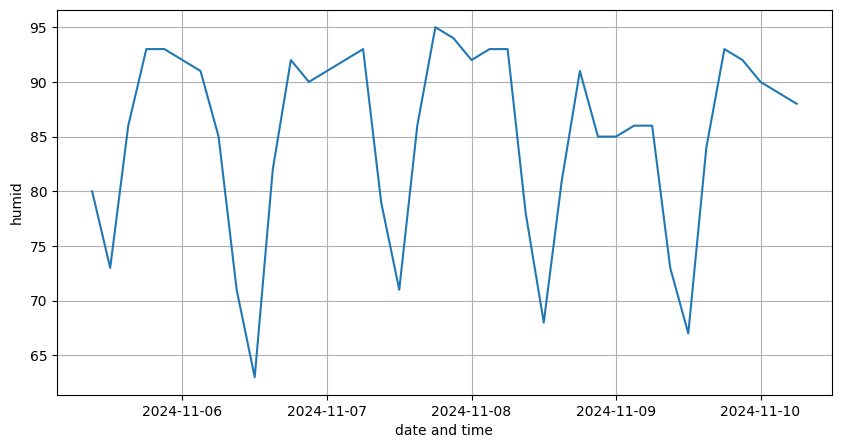

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.lineplot(y='humid',x='date and time',data=weather)
plt.grid();

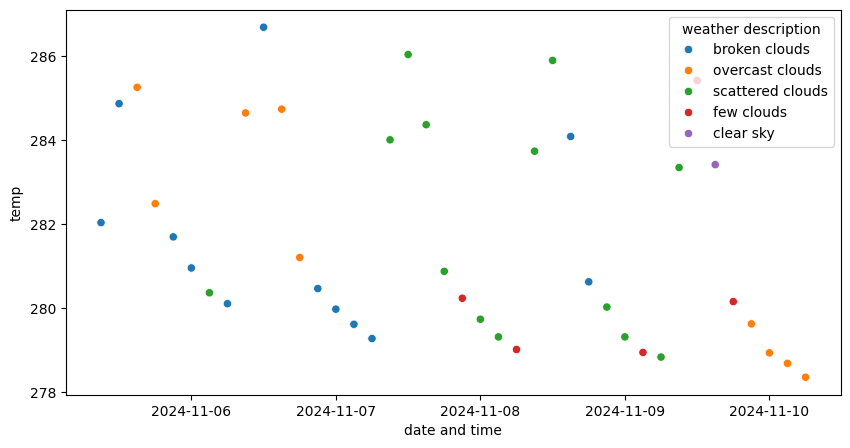

In [25]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='date and time',y='temp',data=weather,hue='weather description');

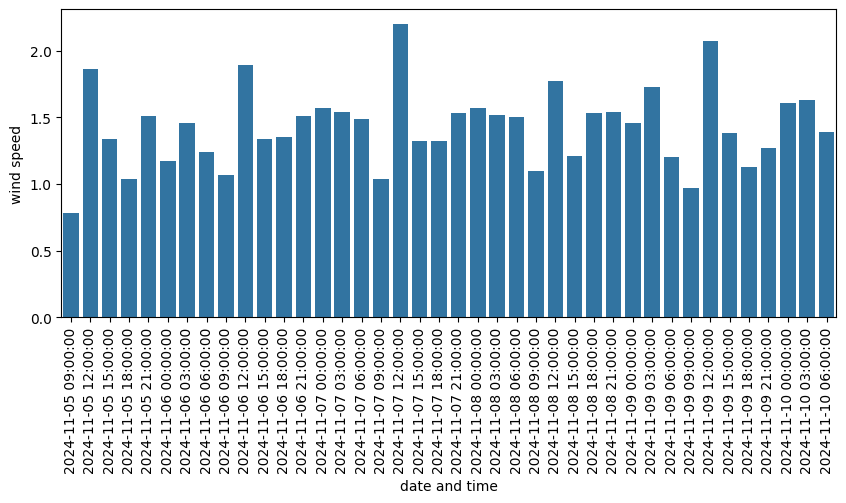

In [38]:
plt.figure(figsize=(10,4))
sns.barplot(x='date and time',y='wind speed',data=weather);
plt.xticks(rotation=90);

# Apply data aggregation techniques to summarise weather statistics by specific time periods (e.g., daily, monthly, seasonal).

In [40]:
weather.groupby('date').agg({'temp':'mean','humid':'mean','wind speed':'max'})

,temp,humid,wind speed
date,,,
2024-11-05,283.262000,85.000,1.86
2024-11-06,282.390000,83.250,1.89
2024-11-07,281.792500,87.625,2.20
2024-11-08,281.548750,85.125,1.77
2024-11-09,281.126250,83.250,2.07
2024-11-10,278.653333,89.000,1.63


# Explore and visualise relationships between weather attributes, such as temperature and humidity, using correlation plots or heatmaps.

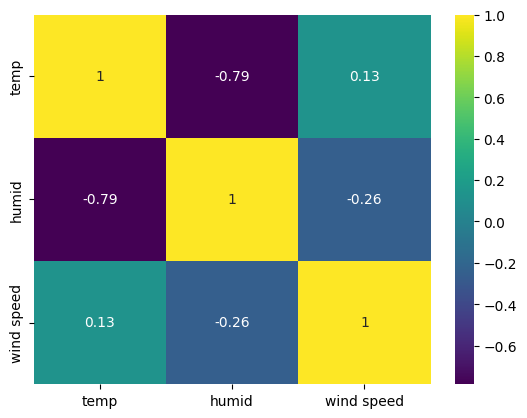

In [54]:
sns.heatmap(weather[['temp','humid','wind speed']].corr(),annot=True,cmap='viridis');